# Regression

In [1]:
import torch
import pandas as pd
import numpy as np

In [2]:
file_name = '../data/wine-quality.csv'

wineDF = pd.read_csv(file_name)
wineDF = wineDF[wineDF.type=='white']
# wineDF
wineDF = wineDF.iloc[:,1:]
wineDF = wineDF.dropna()

In [3]:
featureDF = wineDF.iloc[:,:-1]
featureDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4870 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4870 non-null   float64
 1   volatile acidity      4870 non-null   float64
 2   citric acid           4870 non-null   float64
 3   residual sugar        4870 non-null   float64
 4   chlorides             4870 non-null   float64
 5   free sulfur dioxide   4870 non-null   float64
 6   total sulfur dioxide  4870 non-null   float64
 7   density               4870 non-null   float64
 8   pH                    4870 non-null   float64
 9   sulphates             4870 non-null   float64
 10  alcohol               4870 non-null   float64
dtypes: float64(11)
memory usage: 456.6 KB


In [4]:
wineDF.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.020301,0.287439,0.087979,0.023588,-0.049226,0.091347,0.265525,-0.424343,-0.016492,-0.121851,-0.112172
volatile acidity,-0.020301,1.000000,-0.148473,0.064111,0.072686,-0.096982,0.089975,0.027326,-0.034612,-0.034965,0.067772,-0.196657
citric acid,0.287439,-0.148473,1.000000,0.094602,0.113034,0.093018,0.122023,0.150368,-0.161527,0.064418,-0.076580,-0.010079
residual sugar,0.087979,0.064111,0.094602,1.000000,0.089749,0.299177,0.401275,0.838841,-0.193051,-0.026080,-0.451398,-0.094923
chlorides,0.023588,0.072686,0.113034,0.089749,1.000000,0.101351,0.199369,0.258126,-0.089220,0.017412,-0.360138,-0.210754
free sulfur dioxide,-0.049226,-0.096982,0.093018,0.299177,0.101351,1.000000,0.615601,0.294327,0.000672,0.059679,-0.250329,0.007747
total sulfur dioxide,0.091347,0.089975,0.122023,0.401275,0.199369,0.615601,1.000000,0.529564,0.003552,0.133955,-0.448730,-0.174597
density,0.265525,0.027326,0.150368,0.838841,0.258126,0.294327,0.529564,1.000000,-0.092397,0.074537,-0.780561,-0.305481
pH,-0.424343,-0.034612,-0.161527,-0.193051,-0.089220,0.000672,0.003552,-0.092397,1.000000,0.155553,0.121283,0.097292
sulphates,-0.016492,-0.034965,0.064418,-0.026080,0.017412,0.059679,0.133955,0.074537,0.155553,1.000000,-0.016869,0.054241


<Axes: >

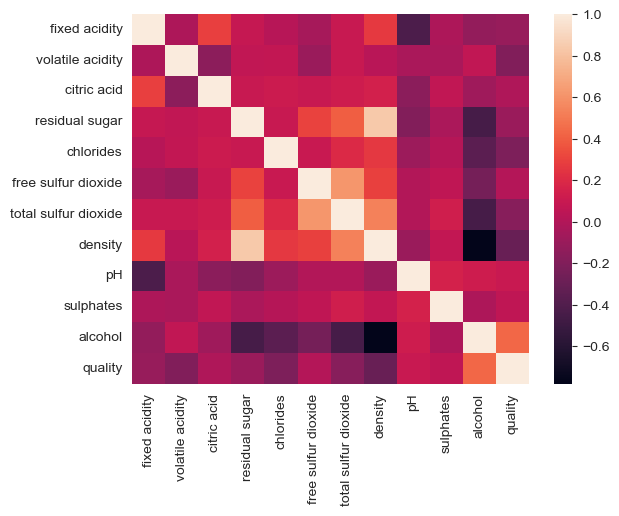

In [5]:
import seaborn as sns
sns.heatmap(wineDF.corr())

In [6]:
# sns.pairplot(wineDF)

In [7]:
targetDF = wineDF.quality
targetDF.info()

<class 'pandas.core.series.Series'>
Index: 4870 entries, 0 to 4897
Series name: quality
Non-Null Count  Dtype
--------------  -----
4870 non-null   int64
dtypes: int64(1)
memory usage: 76.1 KB


In [8]:
# torch.tensor(featureDF.ndarray)

In [9]:
featureNP = np.array(featureDF)
targetNP = np.array(targetDF)
featureTS = torch.from_numpy(featureNP)
targetTS = torch.from_numpy(targetNP)
featureTS.shape, targetTS.shape

(torch.Size([4870, 11]), torch.Size([4870]))

In [10]:
featureTS

tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
        [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
        ...,
        [ 6.6000,  0.3200,  0.3600,  ...,  3.1500,  0.4600,  9.6000],
        [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]],
       dtype=torch.float64)

In [11]:
targetTS

tensor([6, 6, 6,  ..., 5, 7, 6])

In [12]:
targetTS_onehot = torch.zeros(targetTS.shape[0], 10)
targetTS_onehot.scatter_(1,targetTS.unsqueeze(1), 1.0)
# 함수뒤에 언더바 붙으면 inplace 속성 가진 것

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [13]:
featureDF.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [14]:
targetDF.isnull().sum()

0

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    random_state=1)
y_train1 = y_train

poly = PolynomialFeatures(degree=2)
train = poly.fit_transform(X_train)
test = poly.transform(x_test)
# scaler = StandardScaler()
# scaler.fit(X_train)
# train = scaler.transform(X_train)
# test = scaler.transform(x_test)

model = LinearRegression()
model.fit(train, y_train)
trainScore = model.score(train, y_train)
testScore = model.score(test, y_test)

trainScore, testScore

(0.37113419456676144, 0.33904034632162217)

In [16]:
train.shape

(3652, 78)

In [17]:
# W

In [18]:
X_train = torch.from_numpy(np.array(X_train))
x_test = torch.from_numpy(np.array(x_test))
y_train = torch.from_numpy(np.array(y_train))
y_test = torch.from_numpy(np.array(y_test))
train = torch.from_numpy(np.array(train))
train = train.float()
test = torch.from_numpy(np.array(test))
test = test.float()

X_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([3652, 11]),
 torch.Size([1218, 11]),
 torch.Size([3652]),
 torch.Size([1218]))

In [19]:
# X_train.shape, x_test.shape, y_train.shape, y_test.shape


In [20]:
# train

In [21]:
# W

In [22]:
import torch.nn as nn

model = nn.Sequential(
   nn.Linear(78, 1))

In [23]:
# import torch.optim as optim
# 
# W = torch.zeros((78, 1), requires_grad=True)
# b = torch.zeros(1, requires_grad=True)
# # W.shape, b.shape
# 
# optimizer = optim.SGD([W,b], lr=1e-9)
# 
# nb_epochs = 1000
# for epoch in range(nb_epochs+1):
#     hypothesis = train.matmul(W) + b
#     # print(hypothesis)
#     cost = torch.mean((hypothesis-y_train)**2)
#     optimizer.zero_grad()
#     cost.backward()
#     optimizer.step()
# 
#     print(f'Epoch {epoch}번째 hypothesis : {hypothesis.squeeze().detach()} Cost: {cost.item():.3f}')

In [24]:
# import torch.nn as nn
# 
# model = nn.Sequential(
#    nn.Linear(2, 1))

In [25]:
print(list(model.parameters()))
weights = list(model.parameters())

weights

[Parameter containing:
tensor([[ 6.4374e-02, -1.9065e-02, -5.4312e-02, -3.5358e-02, -7.1413e-02,
          4.4442e-03, -1.0495e-01, -2.9521e-02,  2.6126e-02,  3.5196e-02,
          4.0355e-02,  9.1243e-02,  6.7646e-02,  5.7631e-02, -2.4267e-02,
          3.1779e-02, -6.5577e-02, -8.3950e-02, -1.2689e-02,  9.7934e-02,
          6.0616e-02, -1.7078e-02, -5.4745e-02, -7.1307e-02, -1.1649e-05,
         -1.0441e-01, -1.2434e-02,  8.9738e-02, -1.7950e-03,  8.9879e-02,
          9.1428e-02,  5.7253e-02, -8.2795e-03, -4.9309e-02, -8.3275e-02,
         -1.0927e-01, -4.8273e-02,  5.9937e-02, -9.0997e-02,  4.2035e-02,
         -2.0563e-02,  9.9231e-02,  2.5593e-02, -3.4387e-02,  6.0759e-02,
         -1.4301e-02, -4.6367e-02, -8.8541e-02,  4.6548e-02, -4.9171e-04,
         -5.3029e-02,  9.6739e-02, -6.8172e-02, -3.2505e-02,  4.2879e-02,
          2.9679e-02,  6.2804e-02, -5.5074e-02, -5.9361e-02, -9.0031e-02,
          1.1093e-01, -1.0718e-01, -8.6923e-04, -6.8284e-02,  3.5494e-02,
         -1.012

[Parameter containing:
 tensor([[ 6.4374e-02, -1.9065e-02, -5.4312e-02, -3.5358e-02, -7.1413e-02,
           4.4442e-03, -1.0495e-01, -2.9521e-02,  2.6126e-02,  3.5196e-02,
           4.0355e-02,  9.1243e-02,  6.7646e-02,  5.7631e-02, -2.4267e-02,
           3.1779e-02, -6.5577e-02, -8.3950e-02, -1.2689e-02,  9.7934e-02,
           6.0616e-02, -1.7078e-02, -5.4745e-02, -7.1307e-02, -1.1649e-05,
          -1.0441e-01, -1.2434e-02,  8.9738e-02, -1.7950e-03,  8.9879e-02,
           9.1428e-02,  5.7253e-02, -8.2795e-03, -4.9309e-02, -8.3275e-02,
          -1.0927e-01, -4.8273e-02,  5.9937e-02, -9.0997e-02,  4.2035e-02,
          -2.0563e-02,  9.9231e-02,  2.5593e-02, -3.4387e-02,  6.0759e-02,
          -1.4301e-02, -4.6367e-02, -8.8541e-02,  4.6548e-02, -4.9171e-04,
          -5.3029e-02,  9.6739e-02, -6.8172e-02, -3.2505e-02,  4.2879e-02,
           2.9679e-02,  6.2804e-02, -5.5074e-02, -5.9361e-02, -9.0031e-02,
           1.1093e-01, -1.0718e-01, -8.6923e-04, -6.8284e-02,  3.5494e-02,
  

In [26]:
test[0]

tensor([1.0000e+00, 5.8000e+00, 2.6000e-01, 2.9000e-01, 1.0000e+00, 4.2000e-02,
        3.5000e+01, 1.0100e+02, 9.9044e-01, 3.3600e+00, 4.8000e-01, 1.1400e+01,
        3.3640e+01, 1.5080e+00, 1.6820e+00, 5.8000e+00, 2.4360e-01, 2.0300e+02,
        5.8580e+02, 5.7446e+00, 1.9488e+01, 2.7840e+00, 6.6120e+01, 6.7600e-02,
        7.5400e-02, 2.6000e-01, 1.0920e-02, 9.1000e+00, 2.6260e+01, 2.5751e-01,
        8.7360e-01, 1.2480e-01, 2.9640e+00, 8.4100e-02, 2.9000e-01, 1.2180e-02,
        1.0150e+01, 2.9290e+01, 2.8723e-01, 9.7440e-01, 1.3920e-01, 3.3060e+00,
        1.0000e+00, 4.2000e-02, 3.5000e+01, 1.0100e+02, 9.9044e-01, 3.3600e+00,
        4.8000e-01, 1.1400e+01, 1.7640e-03, 1.4700e+00, 4.2420e+00, 4.1598e-02,
        1.4112e-01, 2.0160e-02, 4.7880e-01, 1.2250e+03, 3.5350e+03, 3.4665e+01,
        1.1760e+02, 1.6800e+01, 3.9900e+02, 1.0201e+04, 1.0003e+02, 3.3936e+02,
        4.8480e+01, 1.1514e+03, 9.8097e-01, 3.3279e+00, 4.7541e-01, 1.1291e+01,
        1.1290e+01, 1.6128e+00, 3.8304e+

In [27]:
# torch.tensor(weights).mul(test[0])+b

In [28]:
weights = list(model.parameters())[0]
bias = list(model.parameters())[1]

prediction = torch.mv(weights, test[0]) + bias
print(prediction, y_train[0])

tensor([-1055.0681], grad_fn=<AddBackward0>) tensor(5)


1점에서 10점 사이에 내라고 했는데 자꾸 -300~ 1500 사이에서 최소 300이상 차이나게 나옴..
지나가는 개 짖는 소리로 점수줘도 이거보단 오차가 작겠다

# classifier

In [29]:
featureDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [30]:
targetDF.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [31]:
targetDF = targetDF.replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:1,7:1,8:1,9:1,10:1})
targetDF.unique()

array([1, 0])

In [32]:
targetNP = np.array(targetDF)
targetNP

array([1, 1, 1, ..., 0, 1, 1])

In [33]:
targetTS = torch.tensor(targetNP)
featureTS.shape, targetTS.shape

(torch.Size([4870, 11]), torch.Size([4870]))

In [34]:
model = nn.Sequential(
    nn.Linear(78, 1),
    nn.LogSigmoid()
)

In [35]:
import torch.nn.functional as F

In [36]:
y_train1 = y_train1.replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:1,7:1,8:1,9:1,10:1})
y_train1.unique()

array([0, 1])

In [37]:
train

tensor([[1.0000e+00, 5.2000e+00, 6.0000e-01,  ..., 3.3640e-01, 5.6260e+00,
         9.4090e+01],
        [1.0000e+00, 6.2000e+00, 2.5000e-01,  ..., 1.6000e-01, 4.4400e+00,
         1.2321e+02],
        [1.0000e+00, 7.1000e+00, 2.1000e-01,  ..., 1.5210e-01, 4.2120e+00,
         1.1664e+02],
        ...,
        [1.0000e+00, 6.7000e+00, 2.5000e-01,  ..., 2.3040e-01, 4.5600e+00,
         9.0250e+01],
        [1.0000e+00, 5.4000e+00, 1.5000e-01,  ..., 3.3640e-01, 7.3080e+00,
         1.5876e+02],
        [1.0000e+00, 6.8000e+00, 2.4000e-01,  ..., 3.3640e-01, 5.6260e+00,
         9.4090e+01]])

In [39]:
import torch.optim as optim

nb_epochs = 1000
y_train1 = torch.from_numpy(np.array(y_train1)).unsqueeze(1).float()  

for epoch in range(nb_epochs+1):
    # hypothesis = model(train)

    hypothesis = torch.sigmoid(model(train))
    # print(hypothesis)
    # print(train.shape, y_train1.shape)
    # print(y_train.unsqueeze(1).shape)
    # print(y_train1)


    cost = F.binary_cross_entropy(hypothesis, y_train1)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        prediction = (hypothesis >= 0.5).float()
        correct_prediction = prediction == y_train1
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print(f'Epoch {epoch}/{nb_epochs}, Cost: {cost.item():.4f}, Accuracy: {accuracy*100:.2f}%')

NameError: name 'W' is not defined

어떻게 Cost, Accuracy가 단 한번도 안바뀌냐..

In [ ]:
# 학습 후 W, b 확인
print(list(model.parameters()))

In [ ]:
weights = list(model.parameters())[0]
bias = list(model.parameters())[1]

prediction = torch.mv(weights, test[0]) + bias
print(prediction, y_train[0])